# Prediction of House price using Artificial Neural Network

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('house_Data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/Users/mustafadar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

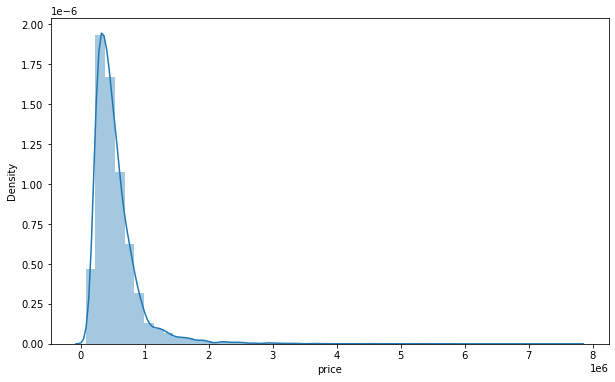

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

/Users/mustafadar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

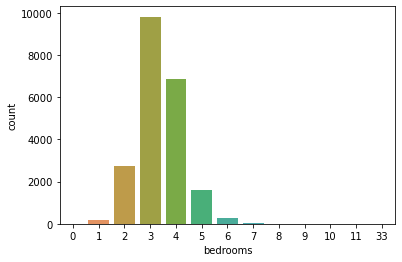

In [10]:
sns.countplot(df['bedrooms'])

In [13]:
#we will find that which feature is highly correlated with our label so for that
df.corr()['price'].sort_values()
#we see that price is highly correlated with the sqft living 
#it means that price is affected highly by the sqrt living

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

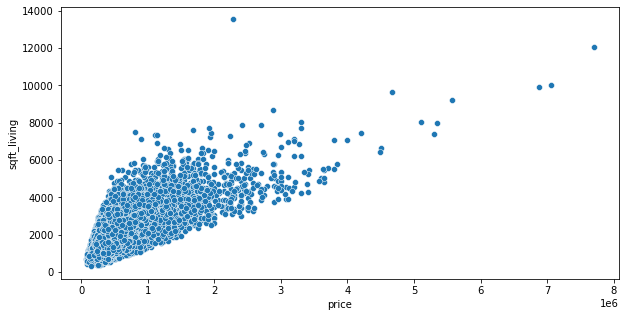

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

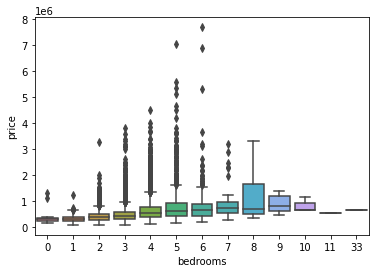

In [16]:
sns.boxplot(x='bedrooms',y='price',data=df)

/Users/mustafadar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

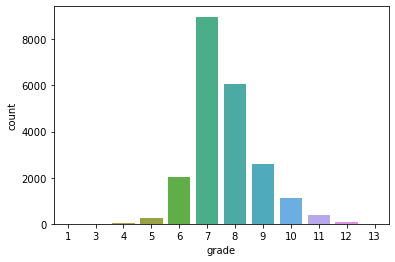

In [19]:
sns.countplot(df['grade'])

<AxesSubplot:xlabel='price', ylabel='long'>

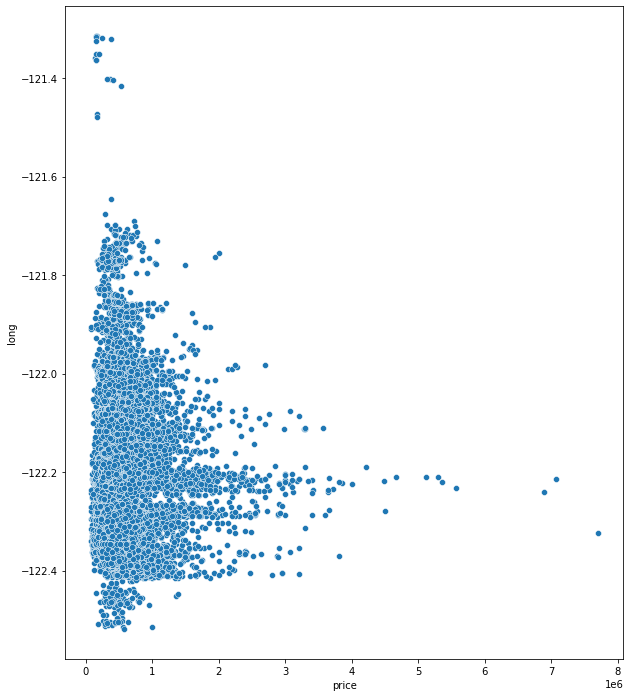

In [20]:
plt.figure(figsize=(10,12))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

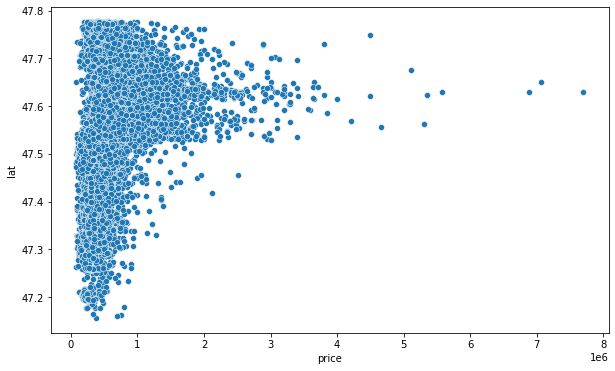

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

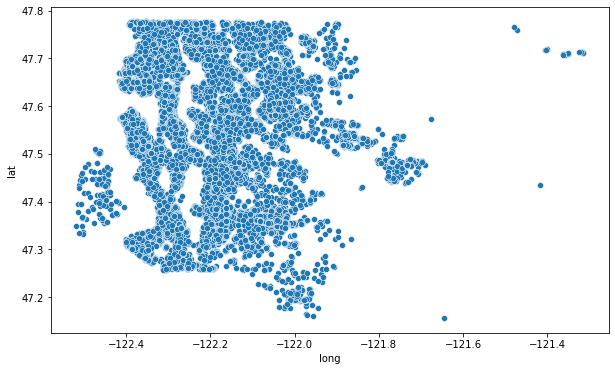

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

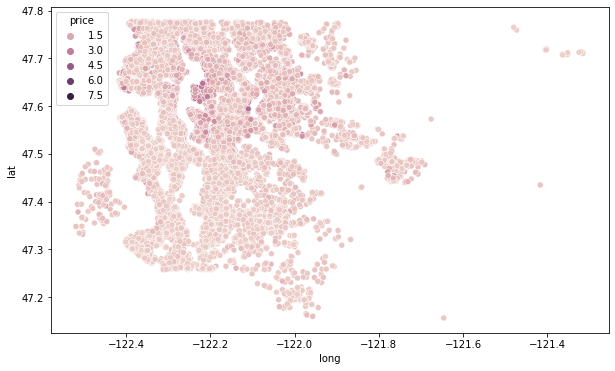

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',hue='price',data=df)

In [24]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [27]:
len(df)*0.01

216.13

In [28]:
non_top_1=df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

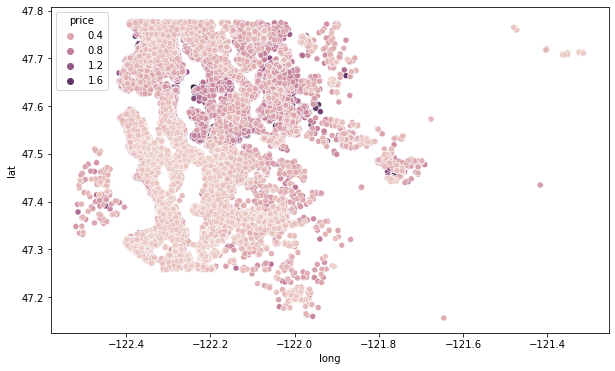

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',hue='price',data=non_top_1)

In [30]:
 df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
df.drop('id',axis=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [39]:
df['date']=pd.to_datetime(df['date'])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [ ]:
#now we can seperate the year and month from the date object so we can perform more feature engineering on it

In [38]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [45]:
def exploration_date(date):
    return date.year


In [49]:
df['year']=df['date'].apply(lambda date:date.year)
df['month']=df['date'].apply(lambda date:date.month)
df['day']=df['date'].apply(lambda date:date.day)

In [50]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


<AxesSubplot:xlabel='month', ylabel='price'>

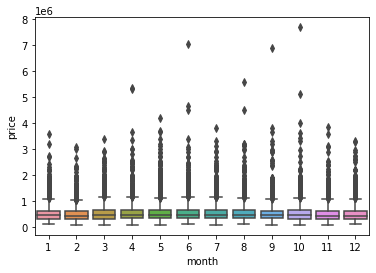

In [51]:
#no explore the data based on month
sns.boxplot(x='month',y='price',data=df)

In [57]:
#we can also do this by the groupby element
df.groupby('month').mean()['price']

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

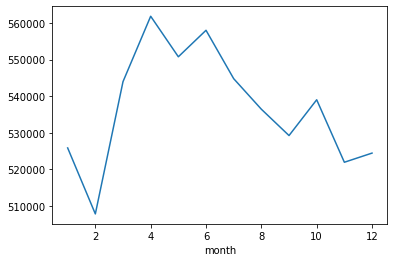

In [58]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

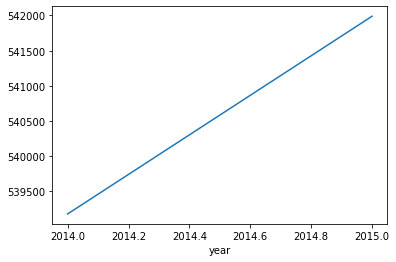

In [59]:
df.groupby('year').mean()['price'].plot()

In [61]:
df=df.drop('date',axis=1)

In [62]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [68]:
df['zipcode'].value_counts()
df.drop('zipcode',axis=1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,47.6993,-122.346,1530,1509,2014,5,21
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,47.5107,-122.362,1830,7200,2015,2,23
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,47.5944,-122.299,1020,2007,2014,6,23
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,47.5345,-122.069,1410,1287,2015,1,16


In [67]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [69]:
#model creation
X=df.drop('price',axis=1).values
y=df['price'].values


In [70]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler=MinMaxScaler()

In [88]:
X_train=scaler.fit_transform(X_train) #fitting and transforming in the same step

In [89]:
X_test=scaler.transform(X_test)
#we dont fit in the stest set we just transform,bc we dont want to assume higher information for our test set

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [93]:
X_train.shape

(15129, 22)

In [92]:
model=Sequential()

In [95]:
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')



In [96]:
#fitting the model for training
#we also used testing data in the fitting  after each epoch we can qucikly run our 
#test data and check our loss on test data so that we can keep track of the loss..
#and keras not use our test data in the 
#fitting but it just checks how it is doing and how much is the loss
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

#batch size is used when there is large amount of data and we send the data in form of batches.
#they are usually in form of powers of 2 such as 62,128
#smaller batch size takes longer time to train but less likely to overfit your data because we are not passing the entire data set in one step


Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 423586725888.0000 - val_loss: 432704225280.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 413303275520.0000 - val_loss: 390173392896.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 251325022208.0000 - val_loss: 120069177344.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 105783795712.0000 - val_loss: 109242097664.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 102217089024.0000 - val_loss: 105860505600.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 98989334528.0000 - val_loss: 102250962944.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 95506530304.0000 - val_loss: 98370232320.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 91720089600.0000 - val_loss: 94327349248.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 1ms/step - loss: 31769360384.0000 - val_loss: 31402868736.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 31653722112.0000 - val_loss: 31417235456.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 31591426048.0000 - val_loss: 31269152768.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 31526025216.0000 - val_loss: 31105144832.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 31507826688.0000 - val_loss: 31053504512.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 31329665024.0000 - val_loss: 31097526272.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 31311818752.0000 - val_loss: 30937798656.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 31192045568.0000 - val_loss: 30852005888.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 27936774144.0000 - val_loss: 27973087232.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 27915675648.0000 - val_loss: 27765848064.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 27901814784.0000 - val_loss: 27733114880.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 27813365760.0000 - val_loss: 27711881216.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 27745923072.0000 - val_loss: 27669166080.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 27753375744.0000 - val_loss: 27660175360.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 27728062464.0000 - val_loss: 27664863232.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 27707906048.0000 - val_loss: 27638038528.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 25472514048.0000 - val_loss: 26062217216.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 25431093248.0000 - val_loss: 26128168960.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 25438908416.0000 - val_loss: 25989957632.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 25412659200.0000 - val_loss: 26026876928.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 25344217088.0000 - val_loss: 26149003264.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 25465194496.0000 - val_loss: 25911556096.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 25327411200.0000 - val_loss: 25933088768.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 25354022912.0000 - val_loss: 25906946048.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 24019443712.0000 - val_loss: 25039278080.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 23953586176.0000 - val_loss: 25006958592.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 23963478016.0000 - val_loss: 24970104832.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 23963308032.0000 - val_loss: 25062766592.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 23903911936.0000 - val_loss: 25088452608.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 23918874624.0000 - val_loss: 24936818688.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 23846055936.0000 - val_loss: 25055074304.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 23989700608.0000 - val_loss: 24943140864.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 23190484992.0000 - val_loss: 24409780224.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 23279966208.0000 - val_loss: 24563824640.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 23172014080.0000 - val_loss: 24430540800.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 23150450688.0000 - val_loss: 24453675008.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 23146616832.0000 - val_loss: 24450363392.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 23126585344.0000 - val_loss: 24376025088.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 23190736896.0000 - val_loss: 24519628800.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 23124072448.0000 - val_loss: 24667918336.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 22588635136.0000 - val_loss: 24307732480.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 22575915008.0000 - val_loss: 24347111424.0000


In [100]:
#predictions and evaluation
losses=pd.DataFrame(model.history.history) #val_loss is the validation data that we have used

<AxesSubplot:>

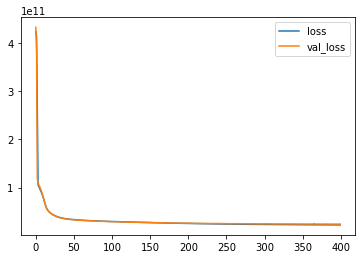

In [101]:
losses.plot()

In [102]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [103]:
X_test

array([[0.21522823, 0.18181818, 0.125     , ..., 1.        , 0.        ,
        0.23333333],
       [0.02185114, 0.36363636, 0.28125   , ..., 1.        , 0.27272727,
        0.66666667],
       [0.7205015 , 0.36363636, 0.3125    , ..., 1.        , 0.09090909,
        0.26666667],
       ...,
       [0.79732901, 0.27272727, 0.25      , ..., 0.        , 0.90909091,
        0.76666667],
       [0.72976523, 0.18181818, 0.125     , ..., 1.        , 0.27272727,
        0.2       ],
       [0.01918417, 0.36363636, 0.4375    , ..., 0.        , 0.72727273,
        0.83333333]])

In [104]:
predictions = model.predict(X_test)

In [105]:
mean_absolute_error(y_test,predictions)

96625.85055521283

In [106]:
np.sqrt(mean_squared_error(y_test,predictions))

156035.62098092242

In [107]:
 df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [108]:
5.400881e+05

540088.1

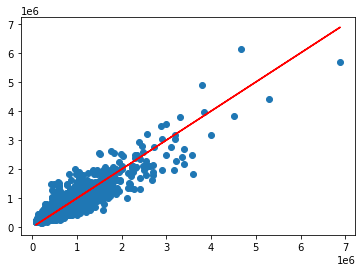

In [109]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [110]:
#now lets try to evaluate our model by predicting the price of the house

single_house=df.drop('price',axis=1).iloc[0]

In [111]:
single_house

id               7.129301e+09
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
zipcode          9.817800e+04
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
year             2.014000e+03
month            1.000000e+01
day              1.300000e+01
Name: 0, dtype: float64

In [112]:
single_house.values

array([ 7.12930052e+09,  3.00000000e+00,  1.00000000e+00,  1.18000000e+03,
        5.65000000e+03,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.00000000e+00,  7.00000000e+00,  1.18000000e+03,  0.00000000e+00,
        1.95500000e+03,  0.00000000e+00,  9.81780000e+04,  4.75112000e+01,
       -1.22257000e+02,  1.34000000e+03,  5.65000000e+03,  2.01400000e+03,
        1.00000000e+01,  1.30000000e+01])

In [115]:
#reshaped it just to add another square bracket
single_house=scaler.transform(single_house.values.reshape(-1,22))

In [116]:
single_house

array([[0.72009742, 0.27272727, 0.125     , 0.06716981, 0.00310751,
        0.        , 0.        , 0.        , 0.5       , 0.5       ,
        0.09758772, 0.        , 0.47826087, 0.        , 0.89393939,
        0.57149751, 0.21760797, 0.16193426, 0.00573322, 0.        ,
        0.81818182, 0.4       ]])

In [117]:
model.predict(single_house)

array([[244101.86]], dtype=float32)

In [118]:
df.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
